In [1]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
from sklearn  import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Set seeds for reproduciability
np.random.seed(0)

# Read dataset

In [3]:
# Import Dataset

traffic_data = pd.read_csv("/Users/nas/Documents/MRP/dataset/Metro_Interstate_Traffic_Volume.csv", parse_dates=['date_time'], index_col='date_time')

In [4]:
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [5]:
# Checking for any missing or empty value
traffic_data.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
traffic_volume             0
dtype: int64

# convert categorical to nominal data

In [6]:
# Convert categorical value to numerical values. For holiday attribute, value will be within by 0 and 1. If it is holiday then 1 otherwise 0
label_encoder = preprocessing.LabelEncoder()
traffic_data['holiday'] = np.where(traffic_data.holiday=='None',0,1).astype('int64')
traffic_data['weather_main'] = label_encoder.fit_transform(traffic_data['weather_main'])
traffic_data['weather_description'] = label_encoder.fit_transform(traffic_data['weather_description'])

In [7]:
traffic_data.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
count,48204.0,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,1.0,281.205870,0.334264,0.000222,49.362231,2.578375,16.540536,3259.818355
std,0.0,13.338232,44.789133,0.008168,39.015750,2.784224,8.970108,1986.860670
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,272.160000,0.000000,0.000000,1.000000,0.000000,10.000000,1193.000000
50%,1.0,282.450000,0.000000,0.000000,64.000000,1.000000,17.000000,3380.000000
75%,1.0,291.806000,0.000000,0.000000,90.000000,5.000000,27.000000,4933.000000
max,1.0,310.070000,9831.300000,0.510000,100.000000,10.000000,37.000000,7280.000000


<Axes: xlabel='date_time'>

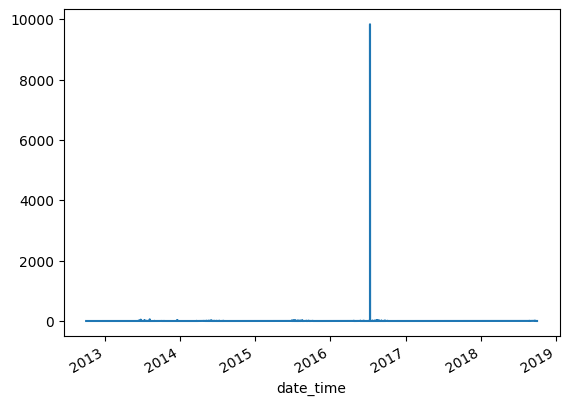

In [8]:
#traffic_data['temp'].plot()
traffic_data['rain_1h'].plot()

<Axes: xlabel='date_time'>

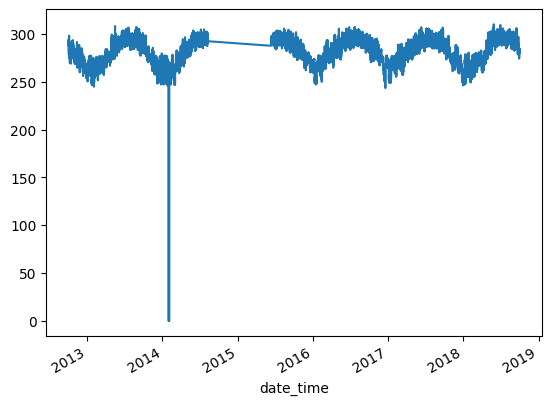

In [9]:
traffic_data['temp'].plot()

In [10]:
Q1 = traffic_data.quantile(0.25)
Q3 = traffic_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

holiday                   0.000
temp                     19.646
rain_1h                   0.000
snow_1h                   0.000
clouds_all               89.000
weather_main              5.000
weather_description      17.000
traffic_volume         3740.000
dtype: float64


In [11]:
traffic_data=traffic_data[~((traffic_data['temp'] <(Q1['temp']-1.5*IQR['temp'])) | (traffic_data['temp'] >(Q1['temp']+1.5*IQR['temp'])))]
#traffic_data=traffic_data[~((traffic_data['rain_1h'] <(Q1['rain_1h']-1.5*IQR['rain_1h'])) | (traffic_data['rain_1h'] >(Q1['rain_1h']+1.5*IQR['rain_1h'])))]

# Prepare training and testing data

<Axes: xlabel='date_time'>

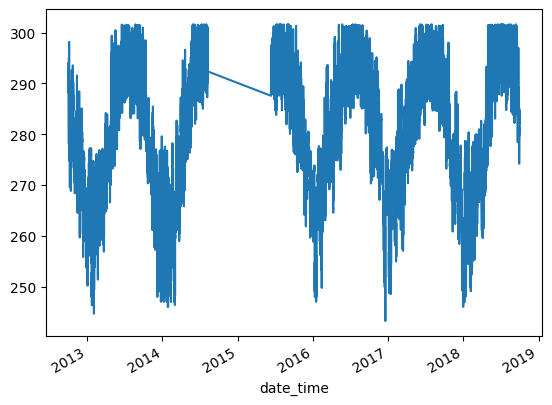

In [12]:
# ploting traffic data to see to see any data imbalance
traffic_data['temp'].plot()

<Axes: xlabel='date_time'>

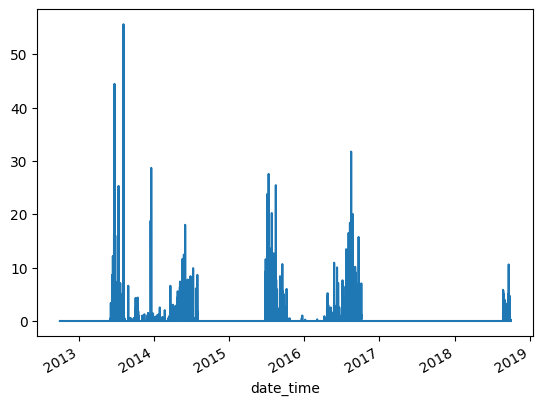

In [13]:
traffic_data['rain_1h'].plot()

In [14]:

traffic_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,1,288.28,0.0,0.0,40,1,24,5545
2012-10-02 10:00:00,1,289.36,0.0,0.0,75,1,2,4516
2012-10-02 11:00:00,1,289.58,0.0,0.0,90,1,19,4767
2012-10-02 12:00:00,1,290.13,0.0,0.0,90,1,19,5026
2012-10-02 13:00:00,1,291.14,0.0,0.0,75,1,2,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,1,283.45,0.0,0.0,75,1,2,3543
2018-09-30 20:00:00,1,282.76,0.0,0.0,90,1,19,2781
2018-09-30 21:00:00,1,282.73,0.0,0.0,90,10,21,2159


In [15]:
# Values of the attribute are in different scales. For example, holiday has maximum value 1 and traffic volume let say, 2000. Since these values are totally different range, it might be hurt model learning process. To overcome this issue, we need to do data normalization or standarization.
sc = MinMaxScaler()
data_set = sc.fit_transform(traffic_data)
data_frame = pd.DataFrame(data_set)


In [16]:
# Make data for the LSTM model. I used past t-hours of data to predict the next 'n' hours data. Here window_size means window size data will be used for predicting next 'n' hours data

def df_to_x_y(data, window_size=5):
    X = []
    y = []
    for i in range(len(data)-window_size):
        row = [r for r in data[i:i+window_size]]
        X.append(row)
        label = data[i+window_size][7]
        y.append(label)
    return np.array(X), np.array(y)

X, y = df_to_x_y(data_set,24)
X.shape, y.shape

((47260, 24, 8), (47260,))

In [17]:
# split data into train test and validation datase
from cgi import test


train_length = int(len(X)*0.8) # 80% trainging
test_length = int(len(X)*.10) # 10% testing and rest for validation
print(train_length, test_length, (train_length+test_length))
X_train, y_train = X[:train_length],y[:train_length]
X_val, y_val = X[train_length:(train_length+test_length)], y[train_length:(train_length+test_length)]
X_test, y_test = X[(train_length+test_length):], y[(train_length+test_length):]

37808 4726 42534


In [18]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape)


(((37808, 24, 8), (37808,)),
 ((4726, 24, 8), (4726,)),
 ((4726, 24, 8), (4726,)))

In [19]:
#define model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.random.set_seed(0)
model = Sequential()
model.add(InputLayer((24,8)))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Dense(1,'linear'))


/Users/nas/Documents/MRP/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [20]:
cp = ModelCheckpoint('/Users/nas/Documents/MRP/Traffic-Volume-Prediction-LSTM-GRU-main/model/model_gru.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))


In [23]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[cp], batch_size=256, verbose=1)

Epoch 1/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - loss: 0.0156 - val_loss: 0.0092
Epoch 2/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.0114 - val_loss: 0.0073
Epoch 3/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - loss: 0.0104 - val_loss: 0.0068
Epoch 4/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - loss: 0.0101 - val_loss: 0.0068
Epoch 5/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - loss: 0.0100 - val_loss: 0.0068
Epoch 6/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - loss: 0.0099 - val_loss: 0.0069
Epoch 7/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - loss: 0.0098 - val_loss: 0.0068
Epoch 8/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0097 - val_loss: 0.0068
Epoch 9/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.0096 - val_loss: 0.0066
Epoch 10/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - loss: 0.0095 - val_loss: 0.0065
Epoch 11/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 12

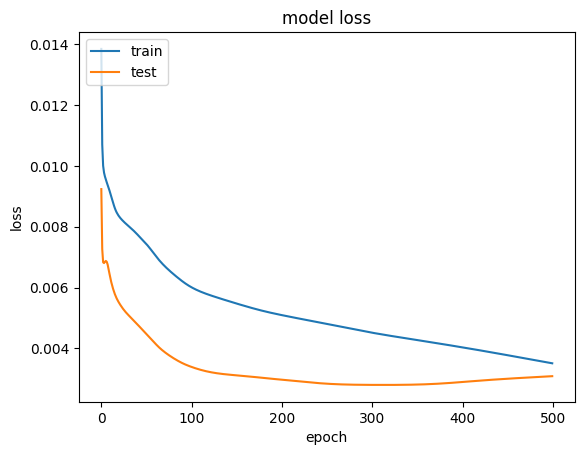

In [24]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from tensorflow.keras.models import load_model
m = load_model('/Users/nas/Documents/MRP/Traffic-Volume-Prediction-LSTM-GRU-main/model/model_gru.keras')

In [26]:
pre = m.predict(X_test)

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [27]:
from tabnanny import verbose

eva = m.evaluate(X_test, y_test, verbose=0)

In [28]:
eva

0.0035208186600357294

In [29]:
Y = np.repeat(pre, 8, axis=1)
TT = sc.inverse_transform(Y)
TT 

array([[1.2116969e+00, 2.5571710e+02, 1.1776696e+01, ..., 2.1169686e+00,
        7.8327837e+00, 1.5411532e+03],
       [1.2048293e+00, 2.5531721e+02, 1.1394656e+01, ..., 2.0482934e+00,
        7.5786853e+00, 1.4911576e+03],
       [1.2068391e+00, 2.5543425e+02, 1.1506458e+01, ..., 2.0683908e+00,
        7.6530461e+00, 1.5057886e+03],
       ...,
       [1.3339808e+00, 2.6283771e+02, 1.8579350e+01, ..., 3.3398077e+00,
        1.2357288e+01, 2.4313799e+03],
       [1.2593179e+00, 2.5849008e+02, 1.4425854e+01, ..., 2.5931787e+00,
        9.5947609e+00, 1.8878341e+03],
       [1.1455426e+00, 2.5186496e+02, 8.0965357e+00, ..., 1.4554262e+00,
        5.3850770e+00, 1.0595503e+03]], dtype=float32)

In [30]:
Y_test = np.repeat(y_test, 8)
Y_test = Y_test.reshape(-1,8)
Y_TT = sc.inverse_transform(Y_test)
Y_TT

array([[1.24354396e+00, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       [1.24354396e+00, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       [1.24354396e+00, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       ...,
       [1.29656593e+00, 2.60659034e+02, 1.64979629e+01, ...,
        2.96565934e+00, 1.09729396e+01, 2.15900000e+03],
       [1.19917582e+00, 2.54988008e+02, 1.10801511e+01, ...,
        1.99175824e+00, 7.36950549e+00, 1.45000000e+03],
       [1.13104396e+00, 2.51020690e+02, 7.28997527e+00, ...,
        1.31043956e+00, 4.84862637e+00, 9.54000000e+02]])

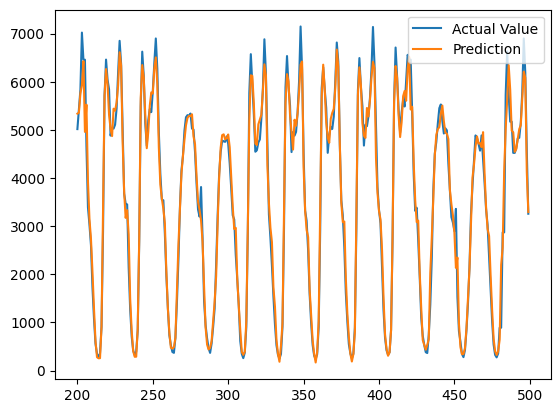

In [31]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:500], Y_test[200:500])
plt.plot(X[200:500], Y_pred[200:500])
plt.legend(['Actual Value','Prediction'])
plt.show()

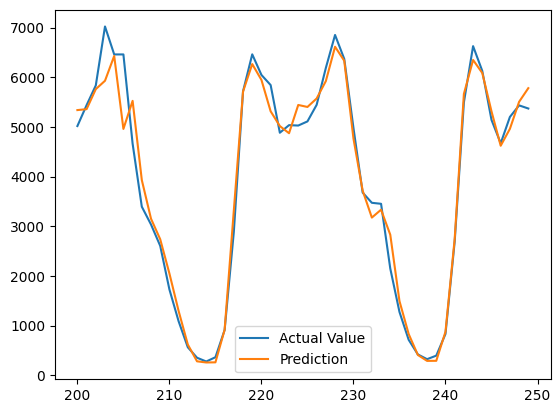

In [32]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:250], Y_test[200:250])
plt.plot(X[200:250], Y_pred[200:250])
plt.legend(['Actual Value','Prediction'])
plt.show()

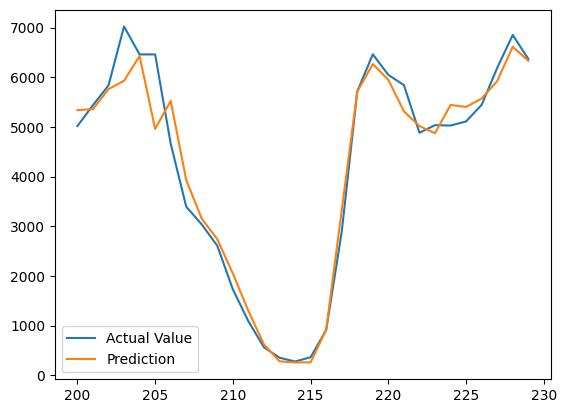

In [33]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:230], Y_test[200:230])
plt.plot(X[200:230], Y_pred[200:230])
plt.legend(['Actual Value','Prediction'])
plt.show()

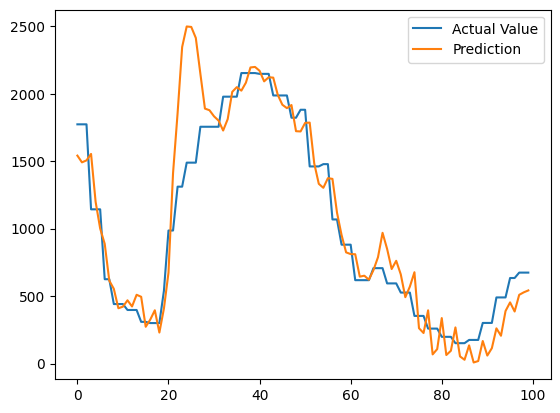

In [34]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[0:100], Y_test[0:100])
plt.plot(X[0:100], Y_pred[0:100])
plt.legend(['Actual Value','Prediction'])
plt.show()